### Dependencies

In [2]:
import matplotlib as mpl
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

new_rc_paramas = {
    'text.usetex' : True,
    'figure.dpi' : 180,
    'text.latex.preamble' : r'\usepackage{libertine}'r'\usepackage{libertinust1math}',
    'font.family' : 'Linux Libertine',
    'axes.titlesize' : 22,
    'axes.labelsize' : 18,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'xtick.top' : True,
    'ytick.right' : True,
    'legend.fontsize' : 'large',
    'axes.linewidth' : 1.2,
    'savefig.bbox' : 'tight',
    'image.aspect' : 'equal',
}

Oh2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^2)$')
Oh3 = mlines.Line2D([], [], color='black', linestyle="-.", label=r'$\mathcal{O}(h^3)$')
Oh1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h)$')
Ohneg2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-2})$')
Ohneg1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-1})$')
Odt = mlines.Line2D([], [], color='black', linestyle="--", label=r'$\mathcal{O}(\Delta t)$')
Odt2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(\Delta t^2)$')
tau1 = mlines.Line2D([], [], color='C4', linestyle="--", label=r'$\tau_0 = \tau_1 = 1$')
tau10neg4 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-4}$')
tau10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-3}$')
tau3x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-3}$')
tau5x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-3}$')
tau3x10neg4 = mlines.Line2D([], [], color='C2', linestyle="-.", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-4}$')
tau5x10neg4 = mlines.Line2D([], [], color='C3', linestyle=":", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-4}$')

conservative = mlines.Line2D([0], [0], marker='None', color='black', linestyle=":", label='Conservative')
classical = mlines.Line2D([0], [0], marker='None', color='black', linestyle=(0, (5,7)), label='Non-conservative')


space = mlines.Line2D([0], [0], marker='None', color='None', linestyle="None", label=' ')

circle = mlines.Line2D([0], [0], marker='o', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Full stabilization.')
                          
star = mlines.Line2D([], [], color='black', marker='*',
                          markersize=9,linestyle="None",
                        markeredgewidth=0.8, markerfacecolor="None", 
                        label='Macro stabilization.')

triangle = mlines.Line2D([0], [0], marker='^', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Macro stab. 2')


import matplotlib.pyplot as plt

mpl.rcParams.update(new_rc_paramas)

import numpy as np

def convergence_rate(errors, mesh_sizes):
    if len(errors) < 2 or len(mesh_sizes) < 2 or len(errors) != len(mesh_sizes):
        raise ValueError("At least two errors and mesh sizes are required.")

    # Take logarithm of errors and mesh sizes
    log_errors = np.log(errors)
    log_mesh_sizes = np.log(mesh_sizes)

    # Compute differences between consecutive elements
    delta_errors = np.diff(log_errors)
    delta_mesh_sizes = np.diff(log_mesh_sizes)

    # Compute convergence rate
    convergence_rates = delta_errors / delta_mesh_sizes

    return convergence_rates


### Errors

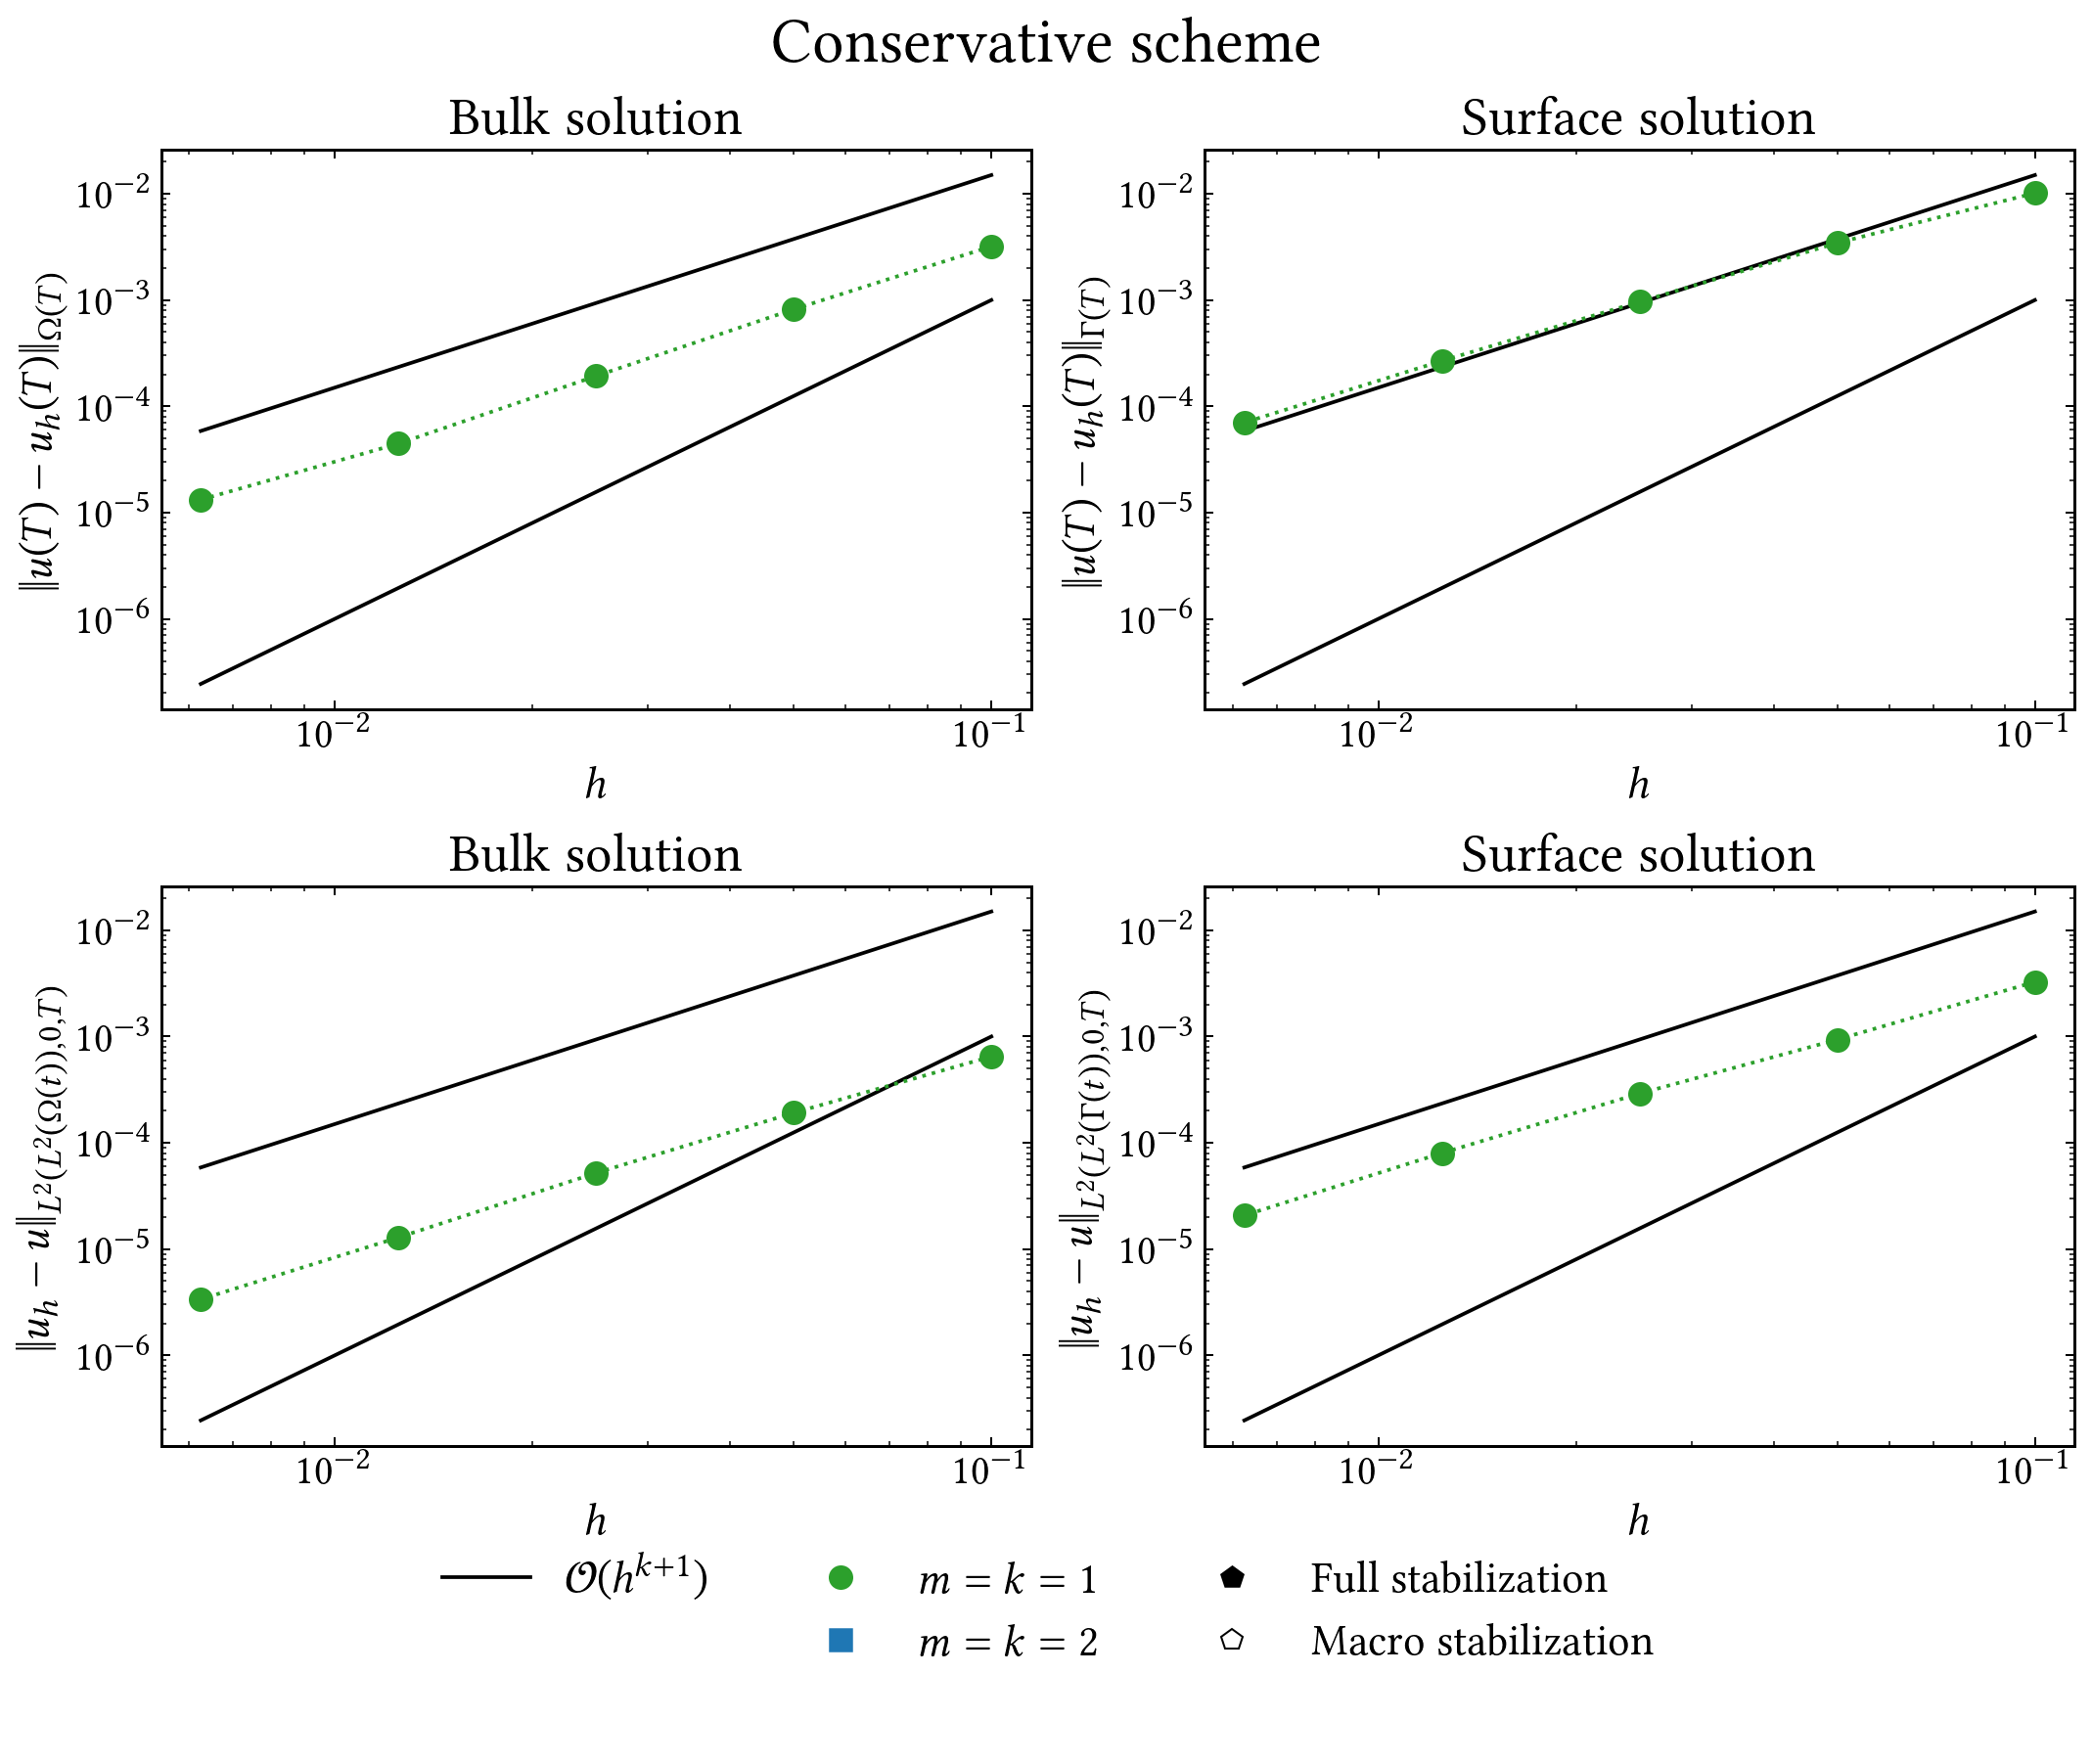

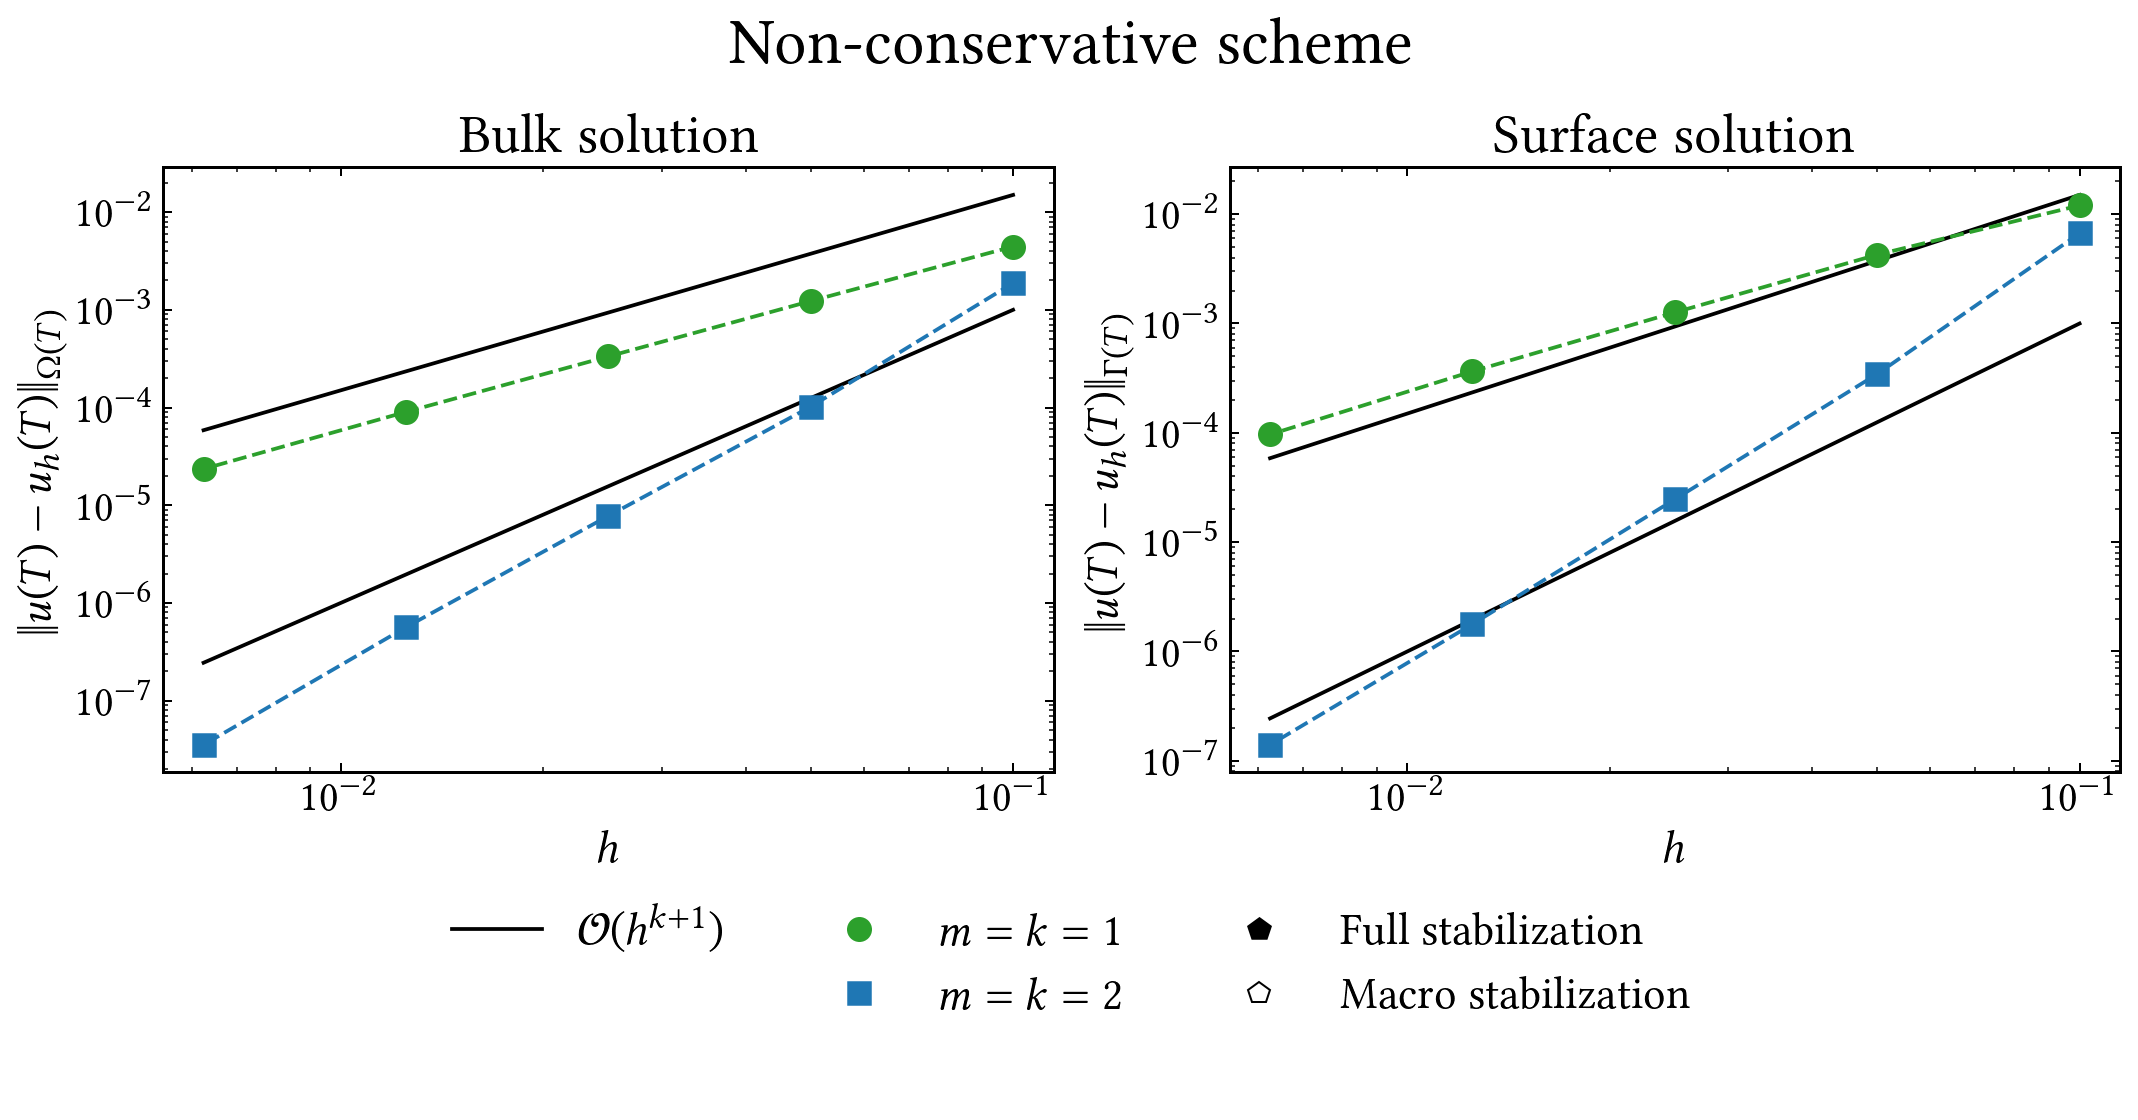

In [5]:
# patch stabilization with all constants = 1 used unless specified else

error_conservative_P1P1_fullstab_bulk = [0.003199250067878164, 0.0008182206054279587, 0.0001927858210696581, 4.451016655286608e-05, 1.322205436894187e-05]
error_conservative_P1P1_fullstab_surf = [0.01015020528163959, 0.003448782191647017, 0.000963568313376971, 0.0002677556846999689, 7.031881565401698e-05]
error_conservative_P1P1_fullstab_bulk_T = [0.0006480918444341815, 0.0001914099487979935, 5.198234468102765e-05, 1.285871638844873e-05, 3.364397229595386e-06]
error_conservative_P1P1_fullstab_surf_T = [0.003264430488973642, 0.0009347759945034615, 0.0002908632779847846, 8.002349490682717e-05, 2.073773768196298e-05]
ec_conservative_P1P1_fullstab = [5.911937606128959e-15, 1.580333086614871e-14, 9.979517212599376e-14, 2.962491363334152e-13, 3.322619956946937e-13]

# error_conservative_P1P1_macro =

error_classical_P1P1_fullstab_bulk = [0.003328296615439367, 0.0008523052107535864, 0.0002005475612939549, 4.594956445999475e-05, 1.315641244714601e-05]
error_classical_P1P1_fullstab_surf = [0.01018689885544533, 0.003443827692387771, 0.0009659730027936442, 0.0002676547217565237, 7.023835557834318e-05]
error_classical_P1P1_fullstab_bulk_T = [0.0007060787077027748, 0.0002044894793386783, 5.458067980391925e-05, 1.337026853612817e-05, 3.394008368514353e-06]
error_classical_P1P1_fullstab_surf_T = [0.00330707527705657, 0.0009462901517673243, 0.0002937808278139268, 8.055371410987052e-05, 2.082493134704475e-05]

#! with std span and vector 
error_classical_P1P1_fullstab_bulk = [0.004445342335376006, 0.001228844416258093, 0.0003331043238063203, 9.011970741148983e-05, 2.351004745488465e-05]
error_classical_P1P1_fullstab_surf = [0.01201692891753313, 0.004260058227284837, 0.001262334855569555, 0.0003648684208242801, 9.654973512267018e-05]
error_classical_P1P1_fullstab_bulk_T = [0.0008993983004665503, 0.0002706970808674977, 7.960119750025873e-05, 2.158168130913521e-05, 5.395174866224525e-06]
error_classical_P1P1_fullstab_surf_T = [0.003840752364432767, 0.00115920714463384, 0.0003828990445761695, 0.0001095482239351513, 2.863064213436047e-05]


# old code
# error_classical_P1P1_fullstab_bulk = [0.00421159, 0.00302629, 0.00067825, 0.000131146, 3.6487e-05]
# error_classical_P1P1_fullstab_surf = [0.00529393, 0.0022302, 0.000601681, 0.000153353, 3.88681e-05]



# error_classical_P1P1_macro = 
# cond_classical_P1P1_macro = 


# P2P2
# error_conservative_P2P2_fullstab_bulk = 
# error_conservative_P2P2_fullstab_surf = 
# error_conservative_P2P2_fullstab_bulk_T = 
# error_conservative_P2P2_fullstab_surf_T = 

# error_conservative_P2P2_macro_bulk = 
# error_conservative_P2P2_macro_surf = 
# error_conservative_P2P2_macro_bulk_T =
# error_conservative_P2P2_macro_surf_T =


error_classical_P2P2_fullstab_bulk = [0.0008858707903617355, 0.0001546002008492998, 8.675345441691812e-05, 4.414031205954027e-05, 2.192975472515178e-05]
error_classical_P2P2_fullstab_surf = [0.003802235234207636, 0.0004935070735418516, 2.813958179506043e-05, 3.944989872584212e-06, 1.460641714941574e-06]
error_classical_P2P2_fullstab_bulk_T = [0.0001992410573064754, 3.063362717952129e-05, 1.576833492982578e-05, 8.29689298308506e-06, 4.218556453695817e-06]
error_classical_P2P2_fullstab_surf_T = [0.001258369596836716, 0.0001379365600469085, 1.071308777587876e-05, 1.088909168683471e-06, 3.759534406676571e-07]

#! face stabilization
error_classical_P2P2_fullstab_bulk = [0.002283872886495375, 0.0002526814872789713, 7.879699597036545e-05, 4.314442384905071e-05, 2.186840806153132e-05]
error_classical_P2P2_fullstab_surf = [0.008337456734640926, 0.001677868787519748, 0.0001297004911334164, 1.475044183847717e-05, 2.014371511629879e-06]
error_classical_P2P2_fullstab_bulk_T = [0.0004666170152103732, 6.526548674224993e-05, 1.591661715325323e-05, 8.110457582492412e-06, 4.204650433481215e-06]
error_classical_P2P2_fullstab_surf_T = [0.002636961669570219, 0.0004805593084422988, 5.690655419743005e-05, 5.090476409750271e-06, 5.731072329922151e-07]

# error_classical_P2P2_fullstab_bulk = 
# error_classical_P2P2_fullstab_surf = 
# error_classical_P2P2_fullstab_bulk_T =
# error_classical_P2P2_fullstab_surf_T =


# different scaling bulk (/h)
# error_classical_P2P2_fullstab_bulk = [0.002362039093991532, 0.0003406211100170119, 7.640862923284984e-05, 3.999156269381066e-05, 2.120730605624073e-05]
# error_classical_P2P2_fullstab_surf = [0.008337046326037694, 0.001675562883658974, 0.0001296835994791347, 1.472189176054167e-05, 2.001851702318954e-06]
# error_classical_P2P2_fullstab_bulk_T = [0.000249962920611411, 3.955507173298434e-05, 9.325466852387913e-06, 3.923814455808268e-06, 2.042426951866927e-06]
# error_classical_P2P2_fullstab_surf_T = [0.00100774765784644, 0.0002554730699431839, 2.373363985209132e-05, 2.391174886532657e-06, 2.78119190723213e-07]

# outer
# error_classical_P2P2_fullstab_bulk = [0.002314296362968994, 0.0003338504457400888, 8.288601448263591e-05, 3.947967402023024e-05, 1.950342909771721e-05]
# error_classical_P2P2_fullstab_surf = [0.007161647162550586, 0.001368498720738738, 0.0001059123110317728, 1.222410605892413e-05, 2.032025239750177e-06]
# error_classical_P2P2_fullstab_bulk_T = [0.0003381788924095473, 4.055768617733397e-05, 9.028281718356927e-06, 3.889246101860038e-06, 1.946729429147093e-06]
# error_classical_P2P2_fullstab_surf_T = [0.000858691483042217, 0.0002089642016180969, 1.857961613430438e-05, 1.943784225252455e-06, 2.804294121889142e-07]

# error measured in T-dt
# error_classical_P2P2_fullstab_bulk = [0.00195141474049424, 0.0002458814197843335, 7.373309543777432e-05, 4.172555464804482e-05, 2.152714810296053e-05]
# error_classical_P2P2_fullstab_surf = [0.01058950618798129, 0.001637246772986591, 0.0001624958858301688, 1.479130563693838e-05, 1.984782489215655e-06]
# error_classical_P2P2_fullstab_bulk_T = [0.0004666413112963725, 6.526820620895121e-05, 1.59165087124058e-05, 8.110465911979926e-06, 4.204651358485518e-06]
# error_classical_P2P2_fullstab_surf_T = [0.002636775497420429, 0.0004805830791968485, 5.690503127377459e-05, 5.09046173207045e-06, 5.730891130818964e-07]

#! with span and vector and dT=h/3 and T=0.12 and std::max(std::abs), N = 9 in space and time
error_classical_P2P2_fullstab_bulk = [0.001877211617507322, 0.0001019043101284447, 7.764285384481633e-06, 5.63572408496165e-07, 3.529213144036336e-08]
error_classical_P2P2_fullstab_surf = [0.006670289730079952, 0.0003449438329181648, 2.464380743600328e-05, 1.777950328406371e-06, 1.400291427072446e-07]
error_classical_P2P2_fullstab_bulk_T = [0.0003707114125953904, 3.10820232460933e-05, 2.680262660384202e-06, 1.904355721487291e-07, 1.448962242097771e-08]
error_classical_P2P2_fullstab_surf_T = [0.001761805325056221, 0.000160616401534733, 1.119763394227607e-05, 7.862365902194567e-07, 6.372302846130508e-08]



circumference = np.abs(np.array([1.068141404234466, 1.068141502220115, 1.06814150222053, 1.068141502220531, 1.068141502220525]) - 2*np.pi*0.17*np.ones(5))
area = np.abs(np.array([0.09079202774226566, 0.09079202768874728, 0.09079202768874527, 0.09079202768874269, 0.09079202768875266]) - np.pi*0.17**2*np.ones(5))

# print(circumference)
# print(area)

# error_classical_P2P2_macro_bulk = 
# error_classical_P2P2_macro_surf = 
# error_classical_P2P2_macro_bulk_T =
# error_classical_P2P2_macro_surf_T = 



h = [0.1, 0.05, 0.025, 0.0125, 0.00625]
#dt = 
nx = [11, 21, 41, 81, 161]






fig, axs = plt.subplots(2, 2, figsize=(12, 9))
fig.suptitle("Conservative scheme", fontsize=26)

#! L2 error
axs[0,0].loglog(h, 1.5*np.power(h, 2), linestyle="-", color="black")  
axs[0,0].loglog(h, 1.*np.power(h, 3), linestyle="-", color="black") 
#axs[0,0].loglog(h, 3.e-1*np.power(h, 4), linestyle="-", color="black")  
axs[0,0].loglog(h, error_conservative_P1P1_fullstab_bulk, marker='o', markersize=9, linestyle=":", color="C2")
#axs[0,0].loglog(h_ext, error_conservative_P2P2_fullstab_bulk, marker='s', markersize=9, linestyle=":", color="C0")
#axs[0,0].loglog(h, error_conservative_P3P3_fullstab_bulk, marker='^', markersize=9, linestyle=":", color="C3")
#axs[0,0].loglog(h, error_conservative_P1P1_macro_bulk, marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C2")
#axs[0,0].loglog(h, error_conservative_P2P2_macro_bulk, marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C0")
#axs[0,0].loglog(h, error_conservative_P3P3_macro_bulk, marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C3")
axs[0,0].set_xlabel(r"$h$", fontsize=18)
axs[0,0].tick_params(axis='both', which='major', labelsize=17)
axs[0,0].set_ylabel(r"$\|u(T)-u_h(T)\|_{\Omega(T)}$", fontsize=18)
axs[0,0].set_title(r"Bulk solution")


axs[0,1].loglog([],[], label=r"$\mathcal{O}(h^{k+1})$", linestyle="-", color="black")
axs[0,1].loglog([],[], linestyle="None", label=" ")
axs[0,1].loglog([],[], linestyle="None", label=" ")
axs[0,1].loglog([],[], linestyle="None",  marker='o', markersize=9, color="C2", label=r"$m = k = 1$")
axs[0,1].loglog([],[], linestyle="None",  marker='s', markersize=9, color="C0", label=r"$m = k = 2$")
#axs[0,1].loglog([],[], linestyle="None",  marker='^', markersize=9, color="C3", label=r"$m = k = 3$")
axs[0,1].loglog([],[], linestyle="None",  marker='p', markersize=9, color="black", label=r"Full stabilization")
axs[0,1].loglog([],[], linestyle="None",  marker='p', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Macro stabilization")
axs[0,1].loglog(h, 1.5*np.power(h, 2), linestyle="-", color="black")  
axs[0,1].loglog(h, 1.*np.power(h, 3), linestyle="-", color="black") 
#axs[0,1].loglog(h, 3.e-1*np.power(h, 4), linestyle="-", color="black") 

axs[0,1].loglog(h, error_conservative_P1P1_fullstab_surf, marker='o', markersize=9, linestyle=":", color="C2")
#axs[0,1].loglog(h_ext, error_conservative_P2P2_fullstab_surf, marker='s', markersize=9, linestyle=":", color="C0")
#axs[0,1].loglog(h, error_conservative_P3P3_fullstab_surf, marker='^', markersize=9, linestyle=":", color="C3")
#axs[0,1].loglog(h, error_conservative_P1P1_macro_surf, marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C2")
#axs[0,1].loglog(h, error_conservative_P2P2_macro_surf, marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C0")
#axs[0,1].loglog(h, error_conservative_P3P3_macro_surf, marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C3")
axs[0,1].set_title(r"Surface solution")
axs[0,1].set_xlabel(r"$h$", fontsize=18)
axs[0,1].tick_params(axis='both', which='major', labelsize=17)
axs[0,1].set_ylabel(r"$\|u(T)-u_h(T)\|_{\Gamma(T)}$", fontsize=18)

#! L2(0,T) error
axs[1,0].loglog(h, 1.5*np.power(h, 2), linestyle="-", color="black")  
axs[1,0].loglog(h, 1.*np.power(h, 3), linestyle="-", color="black") 
#axs[1,0].loglog(h, 3.e-1*np.power(h, 4), linestyle="-", color="black")  
axs[1,0].loglog(h, error_conservative_P1P1_fullstab_bulk_T, marker='o', markersize=9, linestyle=":", color="C2")
#axs[1,0].loglog(h_ext, error_conservative_P2P2_fullstab_bulk_T, marker='s', markersize=9, linestyle=":", color="C0")
# axs[1,0].loglog(h, error_conservative_P3P3_fullstab_bulk_T, marker='^', markersize=9, linestyle=":", color="C3")
# axs[1,0].loglog(h, error_conservative_P1P1_macro_bulk_T, marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C2")
#axs[1,0].loglog(h, error_conservative_P2P2_macro_bulk_T, marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C0")
# axs[1,0].loglog(h, error_conservative_P3P3_macro_bulk_T, marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C3")
axs[1,0].set_xlabel(r"$h$", fontsize=18)
axs[1,0].tick_params(axis='both', which='major', labelsize=17)
axs[1,0].set_ylabel(r"$\|u_h-u\|_{L^2(L^2(\Omega(t)), 0, T)}$")
axs[1,0].set_title(r"Bulk solution")

axs[1,1].loglog(h, 1.5*np.power(h, 2), linestyle="-", color="black")  
axs[1,1].loglog(h, 1.*np.power(h, 3), linestyle="-", color="black") 
#axs[1,1].loglog(h, 3.e-1*np.power(h, 4), linestyle="-", color="black") 

axs[1,1].loglog(h, error_conservative_P1P1_fullstab_surf_T, marker='o', markersize=9, linestyle=":", color="C2")
#axs[1,1].loglog(h_ext, error_conservative_P2P2_fullstab_surf_T, marker='s', markersize=9, linestyle=":", color="C0")
# axs[1,1].loglog(h, error_conservative_P3P3_fullstab_surf_T, marker='^', markersize=9, linestyle=":", color="C3")
# axs[1,1].loglog(h, error_conservative_P1P1_macro_surf_T, marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C2")
#axs[1,1].loglog(h, error_conservative_P2P2_macro_surf_T, marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C0")
# axs[1,1].loglog(h, error_conservative_P3P3_macro_surf_T, marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle=":", color="C3")
axs[1,1].set_title(r"Surface solution")
axs[1,1].set_xlabel(r"$h$", fontsize=18)
axs[1,1].tick_params(axis='both', which='major', labelsize=17)
axs[1,1].set_ylabel(r"$\|u_h-u\|_{L^2(L^2(\Gamma(t)), 0, T)}$")

handles, labels = [(a + b) for a, b in zip(axs[0,0].get_legend_handles_labels(), axs[0,1].get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=3, bbox_to_anchor=(0.5, -0.125), fontsize=18, frameon=False)

plt.tight_layout()
plt.show()


# Non conservative
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle("Non-conservative scheme", fontsize=26)
#ax1.loglog(h, 0.5e-2*np.power(h, 1), linestyle="-", color="black")  
ax1.loglog(h, 1.5*np.power(h, 2), linestyle="-", color="black")  
ax1.loglog(h, 1.*np.power(h, 3), linestyle="-", color="black") 
#ax1.loglog(h, 3.e-1*np.power(h, 4), linestyle="-", color="black")  

ax1.loglog(h, error_classical_P1P1_fullstab_bulk, marker='o', markersize=9, linestyle="--", color="C2")
ax1.loglog(h, error_classical_P2P2_fullstab_bulk, marker='s', markersize=9, linestyle="--", color="C0")
#ax1.loglog(h, error_classical_P3P3_fullstab_bulk, marker='^', markersize=9, linestyle="--", color="C3")
#ax1.loglog(h, error_classical_P1P1_macro_bulk, marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C2")
#ax1.loglog(h, error_classical_P2P2_macro_bulk, marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C0")
#ax1.loglog(h, error_classical_P3P3_macro_bulk, marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C3")

ax1.set_xlabel(r"$h$", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{\Omega(T)}$", fontsize=18)
ax1.set_title(r"Bulk solution")


ax2.loglog([],[], label=r"$\mathcal{O}(h^{k+1})$", linestyle="-", color="black")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='o', markersize=9, color="C2", label=r"$m = k = 1$")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, color="C0", label=r"$m = k = 2$")
#ax2.loglog([],[], linestyle="None",  marker='^', markersize=9, color="C3", label=r"$m = k = 3$")
ax2.loglog([],[], linestyle="None",  marker='p', markersize=9, color="black", label=r"Full stabilization")
ax2.loglog([],[], linestyle="None",  marker='p', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Macro stabilization")

ax2.loglog(h, 1.5*np.power(h, 2), linestyle="-", color="black")  
ax2.loglog(h, 1.*np.power(h, 3), linestyle="-", color="black") 
#ax2.loglog(h, 3.e-1*np.power(h, 4), linestyle="-", color="black") 

ax2.loglog(h, error_classical_P1P1_fullstab_surf, marker='o', markersize=9, linestyle="--", color="C2")
ax2.loglog(h, error_classical_P2P2_fullstab_surf, marker='s', markersize=9, linestyle="--", color="C0")
#ax2.loglog(h, error_classical_P3P3_fullstab_surf, marker='^', markersize=9, linestyle="--", color="C3")
#ax2.loglog(h, error_classical_P1P1_macro_surf, marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C2")
#ax2.loglog(h, error_classical_P2P2_macro_surf, marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C0")
#ax2.loglog(h, error_classical_P3P3_macro_surf, marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", linestyle="--", color="C3")

ax2.set_title(r"Surface solution")
ax2.set_xlabel(r"$h$", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"$\|u(T)-u_h(T)\|_{\Gamma(T)}$", fontsize=18)

handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=3, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)

plt.tight_layout()
plt.show()

